# Import Dependencies and data Cleaning

In [2]:
# import dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Read in the data using pandas
data = pd.read_csv('Data/LA_Crime_Data.csv')

# Conver data into a DataFrame
data_df = pd.DataFrame(data)
data_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
# Clean the data, get rid of NaN values, drop duplicate DR_NO, Get rid of age 0, Get rid blank gender ('-')
data_df.info()
data_df.isnull().sum()
# data_df['Premis Cd'].unique()



# Drop columns that are not needed (Crm Cd 2, Crm Cd 3, Crm Cd 4, Cross Street)
# Get rid of Mcode rows with NaN values.  
# Look into Weapon Desc, Weapon Use. Figure out what the info means (Tracked as a number) Decide if we want to keep it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           925720 non-null  int64  
 1   Date Rptd       925720 non-null  object 
 2   DATE OCC        925720 non-null  object 
 3   TIME OCC        925720 non-null  int64  
 4   AREA            925720 non-null  int64  
 5   AREA NAME       925720 non-null  object 
 6   Rpt Dist No     925720 non-null  int64  
 7   Part 1-2        925720 non-null  int64  
 8   Crm Cd          925720 non-null  int64  
 9   Crm Cd Desc     925720 non-null  object 
 10  Mocodes         796258 non-null  object 
 11  Vict Age        925720 non-null  int64  
 12  Vict Sex        802562 non-null  object 
 13  Vict Descent    802552 non-null  object 
 14  Premis Cd       925709 non-null  float64
 15  Premis Desc     925161 non-null  object 
 16  Weapon Used Cd  319701 non-null  float64
 17  Weapon Des

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           129462
Vict Age               0
Vict Sex          123158
Vict Descent      123168
Premis Cd             11
Premis Desc          559
Weapon Used Cd    606019
Weapon Desc       606019
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          858483
Crm Cd 3          923460
Crm Cd 4          925656
LOCATION               0
Cross Street      780494
LAT                    0
LON                    0
dtype: int64

In [5]:
# Convert DATE OCC to datetime
clean_df = data_df[['DATE OCC']].copy()
clean_df['DATE OCC'] = pd.to_datetime(data_df['DATE OCC'])

# Crime report over the years

In [6]:
# Correctly access the dt accessor on the Series, not the DataFrame
data_2020 = clean_df[clean_df['DATE OCC'].dt.year == 2020]
data_2021 = clean_df[clean_df['DATE OCC'].dt.year == 2021]
data_2022 = clean_df[clean_df['DATE OCC'].dt.year == 2022]
data_2023 = clean_df[clean_df['DATE OCC'].dt.year == 2023]
data_2020

,DATE OCC
0,2020-03-01
1,2020-02-08
2,2020-11-04
3,2020-03-10
4,2020-08-17
...,...
199670,2020-03-05
199671,2020-10-01
199672,2020-12-01
199673,2020-10-20


In [7]:
# count of the crime of each month
# Take the crime count average of each month from the year 2020
crime_count_2020 = data_2020['DATE OCC'].dt.month.value_counts().sort_index()
crime_count_2021 = data_2021['DATE OCC'].dt.month.value_counts().sort_index()
crime_count_2022 = data_2022['DATE OCC'].dt.month.value_counts().sort_index()
crime_count_2023 = data_2023['DATE OCC'].dt.month.value_counts().sort_index()

# Change the names of each month 

# display the data
crime_count_2023

DATE OCC
1     19877
2     18451
3     19145
4     18864
5     18841
6     18655
7     19872
8     19990
9     19217
10    19967
11    18939
12    19337
Name: count, dtype: int64

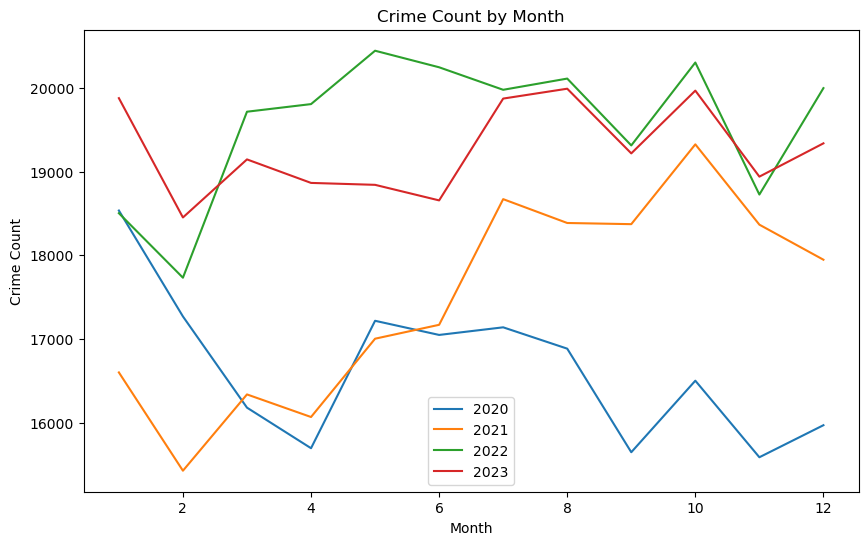

In [19]:
# Plot using matplotlib and export as png
plt.figure(figsize=(10, 6))
plt.plot(crime_count_2020.index, crime_count_2020.values, label='2020')
plt.plot(crime_count_2021.index, crime_count_2021.values, label='2021')
plt.plot(crime_count_2022.index, crime_count_2022.values, label='2022')
plt.plot(crime_count_2023.index, crime_count_2023.values, label='2023')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.title('Crime Count by Month')
plt.legend()
plt.savefig('Images/crime_count_by_month.png')
plt.show()




Bonus October Analysis

In [9]:
# Isolate the october month 
october_2020 = data_2020[data_2020['DATE OCC'].dt.month == 10]
october_2021 = data_2021[data_2021['DATE OCC'].dt.month == 10]
october_2022 = data_2022[data_2022['DATE OCC'].dt.month == 10]
october_2023 = data_2023[data_2023['DATE OCC'].dt.month == 10]

# sort each df by date
october_2020 = october_2020.sort_values(by='DATE OCC')
october_2021 = october_2021.sort_values(by='DATE OCC')
october_2022 = october_2022.sort_values(by='DATE OCC')
october_2023 = october_2023.sort_values(by='DATE OCC')

# Reset the index
october_2020 = october_2020.reset_index(drop=True)
october_2021 = october_2021.reset_index(drop=True)
october_2022 = october_2022.reset_index(drop=True)
october_2023 = october_2023.reset_index(drop=True)

In [10]:
# value count for each year
oct_2020_value_count = october_2020['DATE OCC'].value_counts().sort_index()
oct_2021_value_count = october_2021['DATE OCC'].value_counts().sort_index()
oct_2022_value_count = october_2022['DATE OCC'].value_counts().sort_index()
oct_2023_value_count = october_2023['DATE OCC'].value_counts().sort_index()

# Reset the index
oct_2020_df = oct_2020_value_count.reset_index()
oct_2021_df = oct_2021_value_count.reset_index()
oct_2022_df = oct_2022_value_count.reset_index()
oct_2023_df = oct_2023_value_count.reset_index()

# Renaming columns to be more descriptive
oct_2020_df.columns = ['Date', 'Crime Count']
oct_2021_df.columns = ['Date', 'Crime Count']
oct_2022_df.columns = ['Date', 'Crime Count']
oct_2023_df.columns = ['Date', 'Crime Count']

# Print a DataFrame
oct_2023_df

,Date,Crime Count
0,2023-10-01,723
1,2023-10-02,670
2,2023-10-03,620
3,2023-10-04,619
4,2023-10-05,623
5,2023-10-06,676
6,2023-10-07,661
7,2023-10-08,649
8,2023-10-09,618
9,2023-10-10,628


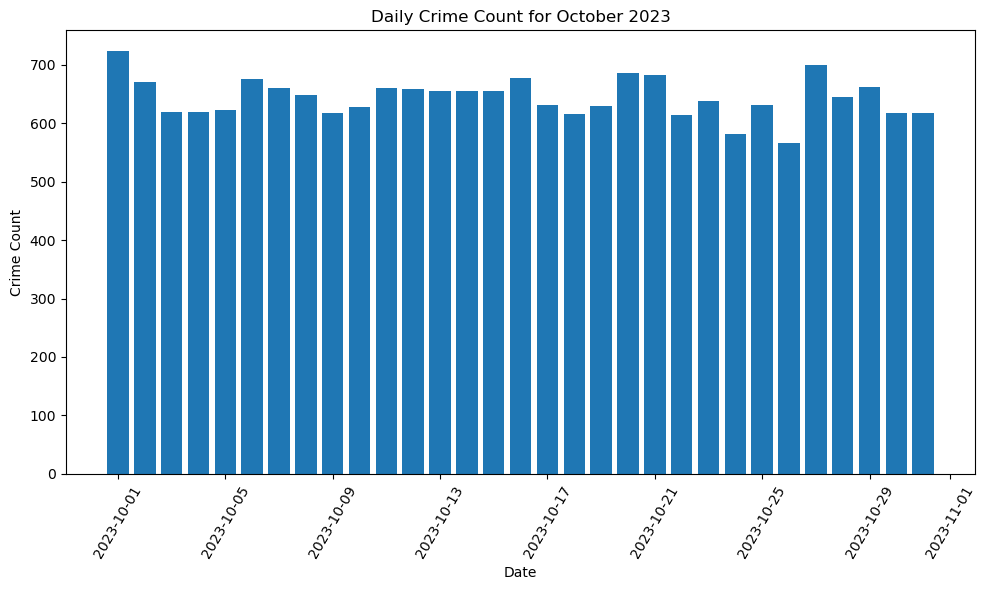

In [11]:
# Now you can plot using this DataFrame
plt.figure(figsize=(10, 6))
plt.bar(oct_2023_df['Date'], oct_2023_df['Crime Count'])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.title('Daily Crime Count for October 2023')
plt.tight_layout()
plt.savefig('Images/daily_crime_count_oct_2023.png')
plt.show()

In [12]:
# value count for september, November, december 2020
september_2020 = data_2020[data_2020['DATE OCC'].dt.month == 9]
september_2020 = september_2020.sort_values(by='DATE OCC')
september_2020 = september_2020.reset_index(drop=True)
sept_2020_value_count = september_2020['DATE OCC'].value_counts().sort_index()
sept_2020_df = sept_2020_value_count.reset_index()
sept_2020_df.columns = ['Date', 'Crime Count']

november_2020 = data_2020[data_2020['DATE OCC'].dt.month == 11]
november_2020 = november_2020.sort_values(by='DATE OCC')
november_2020 = november_2020.reset_index(drop=True)
nov_2020_value_count = november_2020['DATE OCC'].value_counts().sort_index()
nov_2020_df = nov_2020_value_count.reset_index()
nov_2020_df.columns = ['Date', 'Crime Count']

december_2020 = data_2020[data_2020['DATE OCC'].dt.month == 12]
december_2020 = december_2020.sort_values(by='DATE OCC')
december_2020 = december_2020.reset_index(drop=True)
dec_2020_value_count = december_2020['DATE OCC'].value_counts().sort_index()
dec_2020_df = dec_2020_value_count.reset_index()
dec_2020_df.columns = ['Date', 'Crime Count']

In [13]:
sept_2020_df
nov_2020_df
dec_2020_df

,Date,Crime Count
0,2020-12-01,665
1,2020-12-02,548
2,2020-12-03,507
3,2020-12-04,513
4,2020-12-05,555
5,2020-12-06,501
6,2020-12-07,502
7,2020-12-08,491
8,2020-12-09,505
9,2020-12-10,496


# Top Crimes committed in LA (Bar chart) (Ritika)

In [14]:
# Create a dataframe (crime_report_df) that contains the top 10 crimes
# columns = Crime, Count 
crime_report_df = data_df['Crm Cd Desc'].value_counts().reset_index()
crime_report_df.columns = ['Crime', 'Count']
crime_report_df.head(10)

,Crime,Count
0,VEHICLE - STOLEN,99451
1,BATTERY - SIMPLE ASSAULT,73376
2,BURGLARY FROM VEHICLE,57098
3,THEFT OF IDENTITY,57079
4,BURGLARY,56736
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",56148
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",52493
7,THEFT PLAIN - PETTY ($950 & UNDER),47148
8,INTIMATE PARTNER - SIMPLE ASSAULT,45902
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),35698


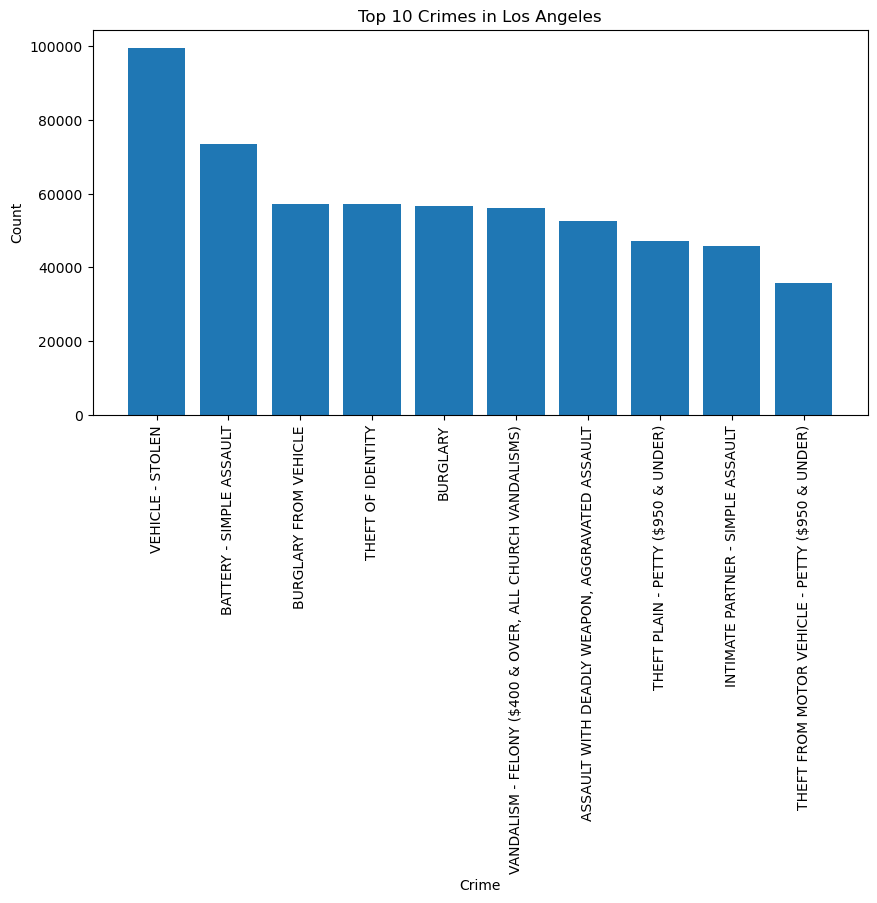

In [15]:
# Plot the top 10 crimes using plt.bar
plt.figure(figsize=(10,5))
plt.bar(crime_report_df['Crime'].head(10), crime_report_df['Count'].head(10))
plt.xlabel('Crime')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 10 Crimes in Los Angeles')
plt.show()

top 10 crimes in LA. Bar chart is nice but a pie chart would be better. Pie chart will show the proportions. I
think it should show the top 10 crimes like below but the other crimes
are lumped together in an ‘other’ category. (Ritika)

In [16]:
# create a dataframe that excludes the top 10 crimes
# columns = Crime, Count
excluded_crime_df = data_df['Crm Cd Desc'].value_counts().reset_index()
excluded_crime_df.columns = ['Crime', 'Count']
excluded_crime_df = excluded_crime_df.iloc[10:]
excluded_value_count = excluded_crime_df['Count'].sum()
excluded_value_count

# # Add row to the crime_report_df
top_crime = crime_report_df.iloc[:10]
top_crime.loc[len(top_crime)] = {'Crime': 'Other', 'Count': 344591}
top_crime


C:\Users\kengt\AppData\Local\Temp\ipykernel_18968\2001659029.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_crime.loc[len(top_crime)] = {'Crime': 'Other', 'Count': 344591}


,Crime,Count
0,VEHICLE - STOLEN,99451
1,BATTERY - SIMPLE ASSAULT,73376
2,BURGLARY FROM VEHICLE,57098
3,THEFT OF IDENTITY,57079
4,BURGLARY,56736
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",56148
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",52493
7,THEFT PLAIN - PETTY ($950 & UNDER),47148
8,INTIMATE PARTNER - SIMPLE ASSAULT,45902
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),35698


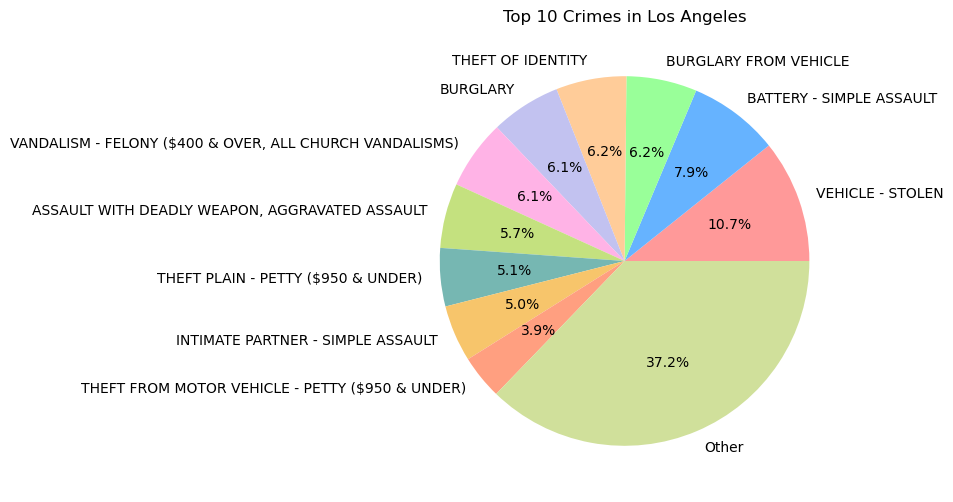

In [17]:
# Define a list of colors that you want to use
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#c4e17f', '#76b7b2', '#f7c56b', '#ff9f80', '#d0e09b']

# Plot the pie chart and specify the 'colors' parameter
plt.figure(figsize=(10, 6))
plt.pie(top_crime['Count'], labels=top_crime['Crime'], autopct='%1.1f%%', colors=colors)
plt.title('Top 10 Crimes in Los Angeles')
plt.show()


# Writing CSV

In [18]:
# Create a dataframe with the crime count in each area
# columns = Area Name, Count
area_df = data_df['AREA NAME'].value_counts().reset_index()
area_df.columns = ['Area_Name', 'Count']

# add custom Lat and Lon to the area_df
area_lat = [34.0375, 34.0444, 34.021, 34.1576, 34.0944, 33.9467, 33.9911, 34.2336, 34.0868, 34.1939, 34.0677, 34.0433, 34.082, 34.1938, 34.1084, 33.9785, 34.0022, 34.174, 33.7234, 34.2713, 34.2648]
area_lon = [-118.3506, -118.2628, -118.3002, -118.4387, -118.3277, -118.2463, -118.2521, -118.4535, -118.2991, -118.4859, -118.552, -118.2892, -118.213, -118.5906, -118.2639, -118.3068, -118.4255, -118.3638, -118.2968, -118.415, -118.5055]

# add lat and lon to the area_df and change to floating point 
area_df['Lat'] = area_lat
area_df['Lon'] = area_lon
area_df['Lat'] = area_df['Lat'].astype(float)
area_df['Lon'] = area_df['Lon'].astype(float)
area_df

# Write the area_df to a csv file
area_df.to_csv('Data/area_crime.csv', index=False)